# "[MachineLearning] Cluster Analysis - DBSCAN"
> KNU AIR week2

- toc: false
- badges: false
- comments: false
- categories: [clustering analysis]
- hide_{github,colab,binder,deepnote}_badge: true

__Content creators:__ 이주형

__Content reviewers:__ 

# 1. Overview

+ Views clusters as areas of high density separated by areas of low density
+ clusters found by DBSCAN can be any shape
+ central component to the DBSCAN is the concept of *core samples*
    + core samples are in areas of high density
+ Parameters : `min_samples`, `eps`
    + `min_samples` : controls how tolerant the algorithm is towards noise
    + `eps` : controls the local neighborhood of the points

+ Core sample :  a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample
+ Cluster : a set of core samples that can be built by recursively taking a core sample
    + = finding all of its neighbors that are core samples
    + = finding all of their neighbors that are core samples
+ non-core samepls : neighbors of a core sample in the cluster but are not themselves core samples
+ Any sample that is not a core sample, and is at least `eps` in distance from any core sample, is considered an outlier by the algorithm.

[Reference](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

# 2. Example

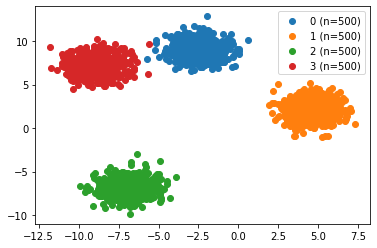

In [1]:
# Create blob datasets

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

SEED = 42

X, y = make_blobs(
    n_samples=2000,
    n_features=2,
    centers=4,
    shuffle=False,
    random_state=SEED
)

for _ in np.unique(y):
    ix = np.where(y == _)
    plt.scatter(X[ix, 0], X[ix, 1], label=f"{_} (n={len(ix[0])})")
plt.legend()
plt.show()

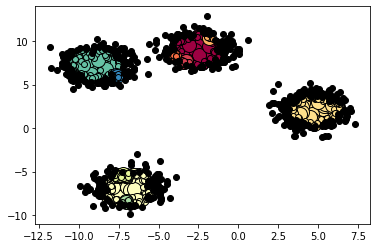

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )